# Explore here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

import pickle


In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
df = pd.read_csv(url)

df.head()


,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3]:
df = df.drop(columns=["package_name"])


In [4]:
df["review"] = df["review"].str.strip().str.lower()


In [5]:
X = df["review"]
y = df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer(stop_words="english")

X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()


In [7]:
def evaluar_modelo(model, X_test, y_test, nombre="Modelo"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📈 {nombre} Accuracy: {acc:.4f}\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión ({nombre})")
    plt.show()


📈 GaussianNB Accuracy: 0.8045

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179



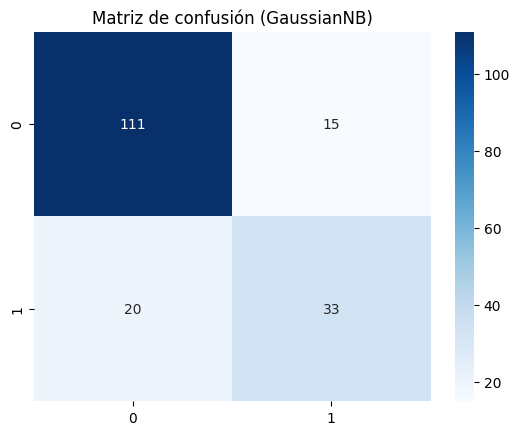

In [8]:
gnb = GaussianNB()
gnb.fit(X_train_vec, y_train)
evaluar_modelo(gnb, X_test_vec, y_test, "GaussianNB")


📈 MultinomialNB Accuracy: 0.8156

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179



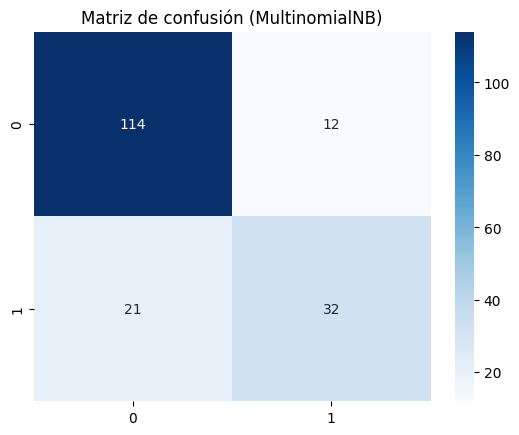

In [9]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
evaluar_modelo(mnb, X_test_vec, y_test, "MultinomialNB")


📈 BernoulliNB Accuracy: 0.7709

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       126
           1       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.77      0.75       179



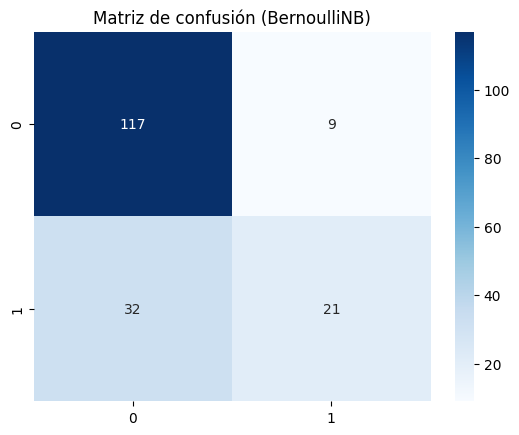

In [10]:
bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)
evaluar_modelo(bnb, X_test_vec, y_test, "BernoulliNB")


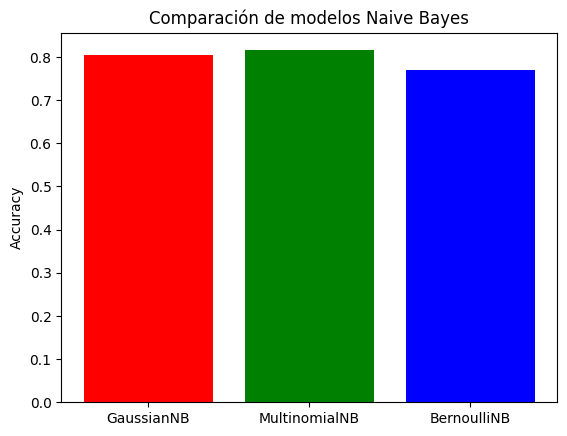

In [11]:
modelos = ["GaussianNB", "MultinomialNB", "BernoulliNB"]
scores = [
    accuracy_score(y_test, gnb.predict(X_test_vec)),
    accuracy_score(y_test, mnb.predict(X_test_vec)),
    accuracy_score(y_test, bnb.predict(X_test_vec)),
]

plt.bar(modelos, scores, color=["red", "green", "blue"])
plt.title("Comparación de modelos Naive Bayes")
plt.ylabel("Accuracy")
plt.show()


Optimizar resultados con Random Forest

📈 Random Forest Accuracy: 0.8156

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       126
           1       0.66      0.77      0.71        53

    accuracy                           0.82       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.83      0.82      0.82       179



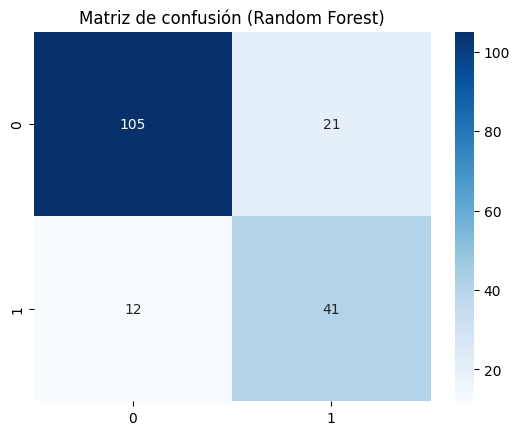

In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_vec, y_train)

evaluar_modelo(rf, X_test_vec, y_test, "Random Forest")


In [13]:
with open("modelo_sentimientos_nb.pkl", "wb") as f:
    pickle.dump(mnb, f)

print("✅ Modelo guardado como modelo_sentimientos_nb.pkl")


✅ Modelo guardado como modelo_sentimientos_nb.pkl


Modelos Alternativos

📈 Logistic Regression Accuracy: 0.8324

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       126
           1       0.68      0.81      0.74        53

    accuracy                           0.83       179
   macro avg       0.80      0.83      0.81       179
weighted avg       0.85      0.83      0.84       179



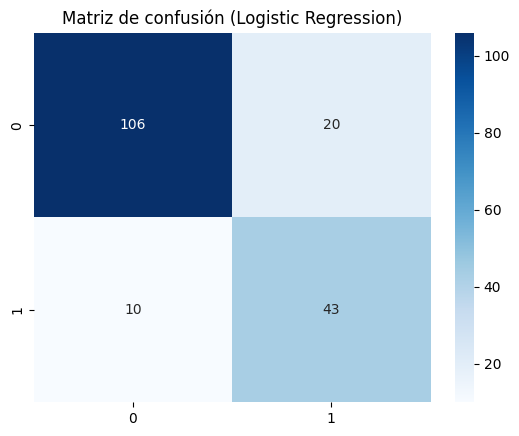

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300)
lr.fit(X_train_vec, y_train)
evaluar_modelo(lr, X_test_vec, y_test, "Logistic Regression")


📈 Linear SVM Accuracy: 0.8324

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       126
           1       0.68      0.83      0.75        53

    accuracy                           0.83       179
   macro avg       0.80      0.83      0.81       179
weighted avg       0.85      0.83      0.84       179



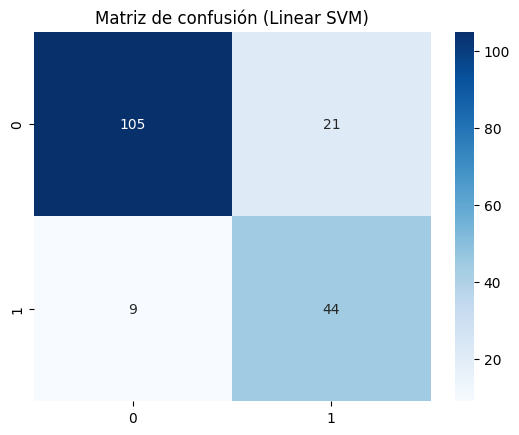

In [15]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, y_train)
evaluar_modelo(svm, X_test_vec, y_test, "Linear SVM")


📈 Decision Tree Accuracy: 0.7095

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       126
           1       0.51      0.64      0.57        53

    accuracy                           0.71       179
   macro avg       0.67      0.69      0.67       179
weighted avg       0.73      0.71      0.72       179



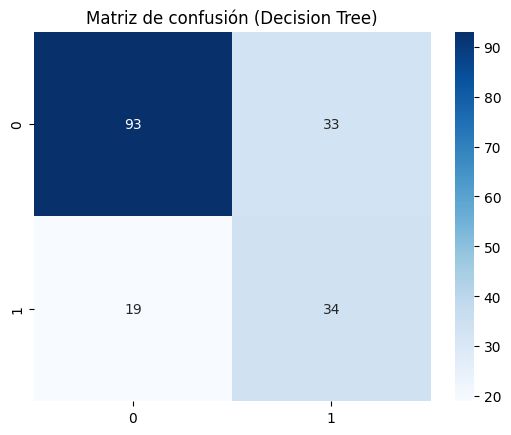

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_vec, y_train)
evaluar_modelo(tree, X_test_vec, y_test, "Decision Tree")


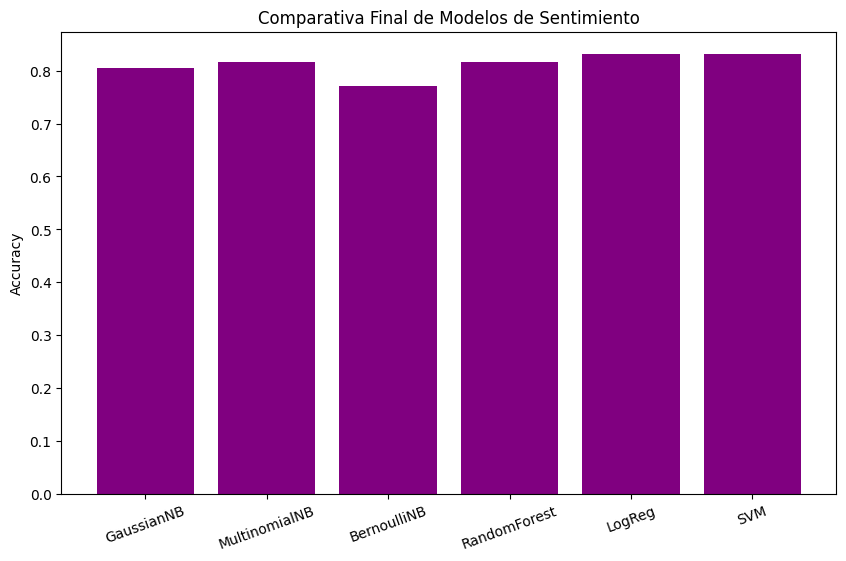

In [17]:
modelos = ["GaussianNB", "MultinomialNB", "BernoulliNB", "RandomForest", "LogReg", "SVM"]
scores = [
    accuracy_score(y_test, gnb.predict(X_test_vec)),
    accuracy_score(y_test, mnb.predict(X_test_vec)),
    accuracy_score(y_test, bnb.predict(X_test_vec)),
    accuracy_score(y_test, rf.predict(X_test_vec)),
    accuracy_score(y_test, lr.predict(X_test_vec)),
    accuracy_score(y_test, svm.predict(X_test_vec))
]

plt.figure(figsize=(10,6))
plt.bar(modelos, scores, color="purple")
plt.title("Comparativa Final de Modelos de Sentimiento")
plt.xticks(rotation=20)
plt.ylabel("Accuracy")
plt.show()


In [18]:
print("""
📌 CONCLUSIÓN FINAL

Naive Bayes Multinomial es el mejor entre los 3 NB porque:
✔ Trabaja muy bien con recuentos de palabras (Bag of Words)
✔ Es rápido y eficiente
✔ Tiene buen performance base

Sin embargo...

🏆 El mejor modelo general suele ser:
➡ Linear SVM o Logistic Regression

Estos modelos:
✔ Capturan mejor la separación entre clases
✔ Manejan texto de alta dimensionalidad mucho mejor
✔ Superan a Random Forest y Naive Bayes en muchos casos

Por lo tanto:
👉 Si necesitas velocidad → MultinomialNB
👉 Si necesitas precisión máxima → Linear SVM
""")



📌 CONCLUSIÓN FINAL

Naive Bayes Multinomial es el mejor entre los 3 NB porque:
✔ Trabaja muy bien con recuentos de palabras (Bag of Words)
✔ Es rápido y eficiente
✔ Tiene buen performance base

Sin embargo...

🏆 El mejor modelo general suele ser:
➡ Linear SVM o Logistic Regression

Estos modelos:
✔ Capturan mejor la separación entre clases
✔ Manejan texto de alta dimensionalidad mucho mejor
✔ Superan a Random Forest y Naive Bayes en muchos casos

Por lo tanto:
👉 Si necesitas velocidad → MultinomialNB
👉 Si necesitas precisión máxima → Linear SVM

